<a href="https://colab.research.google.com/github/jansoe/AIHorizons24/blob/main/BasicImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A simple Artifical Neural Network

In [1]:
import keras
import matplotlib.pyplot as plt
import matplotlib

import numpy as np

## The Data


Our toy data: The MNIST dastaset (handwritten digit recognition)

In [2]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# scaling the pixel values to the range (-1, 1)
train_images = (train_images/255 - 0.5) * 2
test_images = (test_images/255 - 0.5) * 2

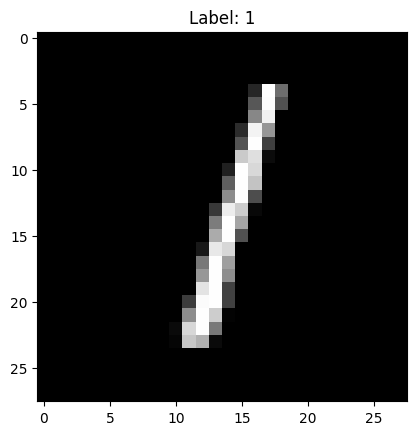

In [3]:
_ = plt.imshow(test_images[2], cmap=plt.cm.gray)
_ = plt.title('Label: %s'%test_labels[2])

In [4]:
train_images.shape

(60000, 28, 28)

The training data conatins 60.000 samples of handwritten digits.
The data is inherently 2D (28x28 pixel).

For our first network we will create now a simple 1D-Vector by flattening the images and thus discarding the 2D neighbourhood structure.

In [5]:
train_images_flat = train_images.reshape((-1, 28*28))
test_images_flat = test_images.reshape((-1, 28*28))

train_images_flat.shape

(60000, 784)

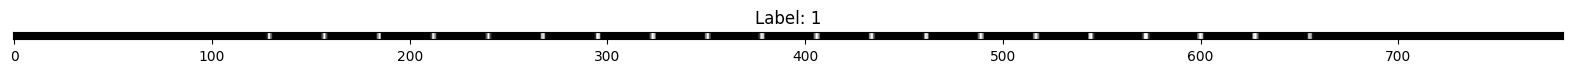

In [6]:
plt.figure(figsize=(20,0.1))
_ = plt.imshow(test_images_flat[2].reshape(1, -1), cmap=plt.cm.gray, aspect='auto')
_ = plt.title('Label: %s'%test_labels[2])
_ = plt.yticks([])

## The most simple Network

In [7]:
input_layer = keras.layers.Input((784,))

All features (pixel values) are mapped to probabilities for all 10 labels



In [8]:
# A Dense Layer ist an all-to-all conection of input and output neurons
out_layer = keras.layers.Dense(
    units=10,                      # output: 10 units for 10 categories
    activation='softmax',          # softmax-activation, so that probabilities sum up to 1
    name = 'probabilities'
)

In [9]:
model1 = keras.models.Sequential()
model1.add(input_layer)
model1.add(out_layer)

In [10]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ probabilities (Dense)                │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

For training the model we need to specify the loss to minimize, and the procedure to do this.

For our case of `multiclass-classification` we can use the loss of `categorical_crossentropy`, which measures how many bits of uncertainty are left to obtain the true labels given our prediction.

In [11]:
model1.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'Adam',      # optimization procdure
    metrics = ['accuracy']  # Monitoring training
)

Now we can fit our data to the model

In [12]:
history = model1.fit(
    x = train_images_flat,
    y = train_labels,
    batch_size = 16,
    validation_data = (test_images_flat, test_labels),
    epochs = 20  # one epoche is one sweep through the training data
)

Epoch 1/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - accuracy: 0.8209 - loss: 0.5896 - val_accuracy: 0.9004 - val_loss: 0.3405
Epoch 2/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.8994 - loss: 0.3456 - val_accuracy: 0.9112 - val_loss: 0.3063
Epoch 3/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9080 - loss: 0.3233 - val_accuracy: 0.9116 - val_loss: 0.3172
Epoch 4/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9126 - loss: 0.3082 - val_accuracy: 0.9134 - val_loss: 0.3119
Epoch 5/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9117 - loss: 0.3158 - val_accuracy: 0.9109 - val_loss: 0.3106
Epoch 6/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9113 - loss: 0.3075 - val_accuracy: 0.9040 - val_loss: 0.3321
Epoch 7/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9128 - loss: 0.3102 - val_accuracy: 0.9106 - val_loss: 0.3101
Epoch 8/20
3750/3750 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9161 - loss: 0.2982 - 

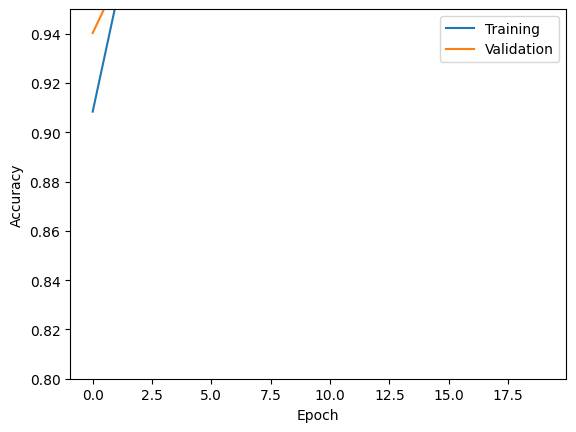

In [20]:
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.ylim([.8, .95])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

## Getting Deeper  

Additional `hidden layers` increase complexity and thus expressiveness of the network.

In [24]:
input_layer = keras.layers.Input((784,))

In [25]:
hidden_layer = keras.layers.Dense(
    units = 1000,            # 200 units als intermediate-output
    activation = 'relu',  # one of the most popular activation functions
    name = 'hidden'
)

In [26]:
# unser outputlayer as above
out_layer = keras.layers.Dense(
    units=10,
    activation='softmax',
    name= 'out'
)

In [27]:
model2 = keras.models.Sequential()
model2.add(input_layer)
model2.add(hidden_layer)
model2.add(out_layer)

model2.compile(
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy'],
    optimizer = 'Adam',
)

In [28]:
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hidden (Dense)                       │ (None, 1000)                │         785,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ out (Dense)                          │ (None, 10)                  │          10,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 795,010 (3.03 MB)

 Trainable params: 795,010 (3.03 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
history = model2.fit(
    x = train_images_flat,
    y = train_labels,
    validation_data = (test_images_flat, test_labels),
    epochs = 20
)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8698 - loss: 0.4365 - val_accuracy: 0.9613 - val_loss: 0.1336
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9572 - loss: 0.1364 - val_accuracy: 0.9649 - val_loss: 0.1135
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9671 - loss: 0.1012 - val_accuracy: 0.9720 - val_loss: 0.0958
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9749 - loss: 0.0800 - val_accuracy: 0.9748 - val_loss: 0.0870
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9775 - loss: 0.0722 - val_accuracy: 0.9691 - val_loss: 0.1018
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9789 - loss: 0.0642 - val_accuracy: 0.9677 - val_loss: 0.1195
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9824 - loss: 0.0525 - val_accuracy: 0.9673 - val_loss: 0.1092
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9842 - loss: 0.0486 - 

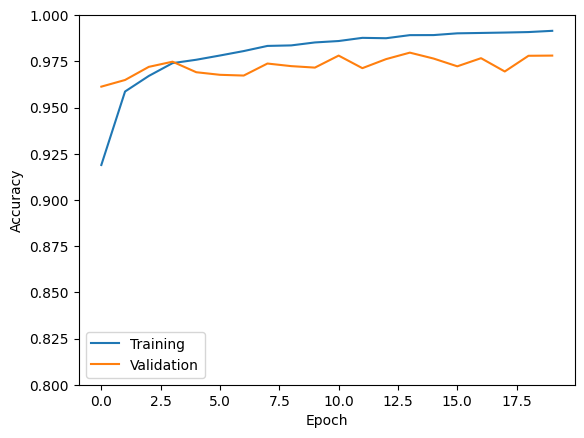

In [30]:
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.ylim([.8, 1])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()


### Task: Experiments
Observe the train and validation error
- in/decrease the number of neurons in the `hidden layer` (getting wider)
- with a second `hidden layer 2` (getting deeper)
